In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
caminho_do_arquivo_kaggle = r'C:\Users\rapha\Downloads\Ecommerce_DBS\Ecommerce_DBS.csv'

In [16]:
#df = dataframe
df = pd.read_csv(caminho_do_arquivo_kaggle)

In [17]:
df = pd.read_csv(r'C:\Users\rapha\Downloads\Ecommerce_DBS\Ecommerce_DBS.csv')

In [19]:
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,NPS,Customer Age,Gender,Source,Country,State,Latitude,Longituide
0,46251,08/09/2020,Electronics,12,3,740,7,20,Male,Instagram Campign,Canada,Alberta,55.000000,-115.000000
1,46251,05/03/2022,Home,468,4,2739,8,20,Male,Instagram Campign,Canada,Ontario,50.000000,-85.000000
2,46251,23/05/2022,Home,288,2,3196,10,20,Male,SEM,United States,New Mexico,34.840515,-106.248482
3,46251,12/11/2020,Clothing,196,1,3509,3,20,Male,Instagram Campign,Canada,Saskatchewan,55.000000,-106.000000
4,13593,27/11/2020,Home,449,1,3452,3,20,Female,Instagram Campign,United States,California,36.116203,-119.681564


In [21]:
df.tail()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,NPS,Customer Age,Gender,Source,Country,State,Latitude,Longituide
249995,33308,10/08/2023,Clothing,279,2,2187,1,55,Male,SEM,United States,Indiana,39.849426,-86.258278
249996,48835,23/11/2021,Home,27,1,3615,1,42,Female,Instagram Campign,Canada,Quebec,53.000000,-70.000000
249997,21019,02/07/2020,Home,17,5,2466,0,41,Male,Instagram Campign,United States,Indiana,39.849426,-86.258278
249998,49234,30/12/2020,Books,398,2,3668,8,34,Female,Instagram Campign,Canada,New Brunswick,46.498390,-66.159668
249999,16971,13/03/2021,Electronics,425,4,2370,2,36,Female,Organic Search,Canada,Prince Edward Island,46.250000,-63.000000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Customer ID            250000 non-null  int64         
 1   Purchase Date          250000 non-null  datetime64[ns]
 2   Product Category       250000 non-null  object        
 3   Product Price          250000 non-null  int64         
 4   Quantity               250000 non-null  int64         
 5   Total Purchase Amount  250000 non-null  int64         
 6   NPS                    250000 non-null  int64         
 7   Customer Age           250000 non-null  int64         
 8   Gender                 250000 non-null  object        
 9   Source                 250000 non-null  object        
 10  Country                250000 non-null  object        
 11  State                  250000 non-null  object        
 12  Latitude               250000 non-null  floa

In [24]:
df.shape

(250000, 14)

In [26]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], format='%d/%m/%Y')

In [29]:
df['Year'] = df['Purchase Date'].dt.year

In [31]:
df.columns.tolist()

['Customer ID',
 'Purchase Date',
 'Product Category',
 'Product Price',
 'Quantity',
 'Total Purchase Amount',
 'NPS',
 'Customer Age ',
 'Gender',
 'Source',
 'Country',
 'State',
 'Latitude',
 'Longituide',
 'Year']

In [34]:
df.drop(columns=['Latitude', 'Longituide'], inplace=True)

In [38]:
df.columns.tolist()

['Customer ID',
 'Purchase Date',
 'Product Category',
 'Product Price',
 'Quantity',
 'Total Purchase Amount',
 'NPS',
 'Customer Age',
 'Gender',
 'Source',
 'Country',
 'State',
 'Year']

In [37]:
df.rename(columns={'Customer Age ':'Customer Age'}, inplace=True)

In [39]:
dict_colunas = {}

for coluna in df.columns.tolist():
    dict_colunas[coluna] = coluna.replace(' ', '_')

{'Customer ID': 'Customer_ID', 'Purchase Date': 'Purchase_Date', 'Product Category': 'Product_Category', 'Product Price': 'Product_Price', 'Quantity': 'Quantity', 'Total Purchase Amount': 'Total_Purchase_Amount', 'NPS': 'NPS', 'Customer Age': 'Customer_Age', 'Gender': 'Gender', 'Source': 'Source', 'Country': 'Country', 'State': 'State', 'Year': 'Year'}


In [40]:
df.rename(columns=dict_colunas, inplace=True)

In [44]:
def cria_faixas(idade):
    
    if idade <18:
        return 'Menos que 18 anos'
    if idade <= 25:
        return 'Entre 18-25 anos'
    if idade <= 35:
        return 'Entre 26-35 anos'
    if idade <= 45:
        return 'Entre 36-45 anos'
    if idade <= 55:
        return 'Entre 46-55 anos'
    if idade <= 65:
        return 'Entre 56-65 anos'
    else:
        return '66 anos ou mais'

In [45]:
df['faixa_idade'] = df['Customer_Age'].apply(cria_faixas)

In [48]:
df_faixas_idade = df['faixa_idade'].value_counts().reset_index(name='contagem')

In [49]:
df_faixas_idade

,faixa_idade,contagem
0,Entre 26-35 anos,47043
1,Entre 36-45 anos,46899
2,Entre 56-65 anos,46524
3,Entre 46-55 anos,46448
4,Entre 18-25 anos,39565
5,66 anos ou mais,23521


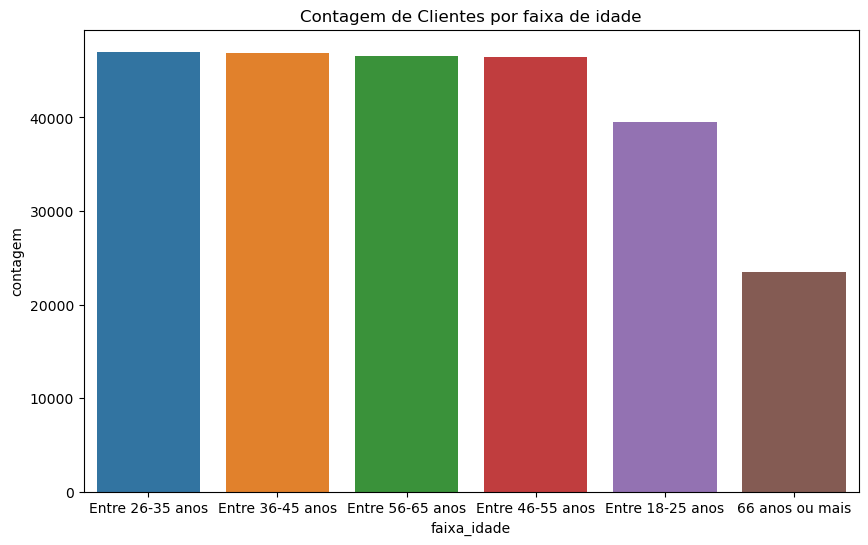

In [50]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='faixa_idade', y='contagem', data=df_faixas_idade)
plt.title('Contagem de Clientes por faixa de idade')
plt.show()

In [57]:
df_agrupado = df.groupby(['Product_Category', 'Gender', 'faixa_idade'])['Quantity'].sum().reset_index(name='Qtde_vendas')

In [53]:
df

,Customer_ID,Purchase_Date,Product_Category,Product_Price,Quantity,Total_Purchase_Amount,NPS,Customer_Age,Gender,Source,Country,State,Year,faixa_idade
0,46251,2020-09-08,Electronics,12,3,740,7,20,Male,Instagram Campign,Canada,Alberta,2020,Entre 18-25 anos
1,46251,2022-03-05,Home,468,4,2739,8,20,Male,Instagram Campign,Canada,Ontario,2022,Entre 18-25 anos
2,46251,2022-05-23,Home,288,2,3196,10,20,Male,SEM,United States,New Mexico,2022,Entre 18-25 anos
3,46251,2020-11-12,Clothing,196,1,3509,3,20,Male,Instagram Campign,Canada,Saskatchewan,2020,Entre 18-25 anos
4,13593,2020-11-27,Home,449,1,3452,3,20,Female,Instagram Campign,United States,California,2020,Entre 18-25 anos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33308,2023-08-10,Clothing,279,2,2187,1,55,Male,SEM,United States,Indiana,2023,Entre 46-55 anos
249996,48835,2021-11-23,Home,27,1,3615,1,42,Female,Instagram Campign,Canada,Quebec,2021,Entre 36-45 anos
249997,21019,2020-07-02,Home,17,5,2466,0,41,Male,Instagram Campign,United States,Indiana,2020,Entre 36-45 anos
249998,49234,2020-12-30,Books,398,2,3668,8,34,Female,Instagram Campign,Canada,New Brunswick,2020,Entre 26-35 anos


In [58]:
df_agrupado

,Product_Category,Gender,faixa_idade,Qtde_vendas
0,Books,Female,66 anos ou mais,10440
1,Books,Female,Entre 18-25 anos,17383
2,Books,Female,Entre 26-35 anos,21414
3,Books,Female,Entre 36-45 anos,20996
4,Books,Female,Entre 46-55 anos,20703
5,Books,Female,Entre 56-65 anos,20708
6,Books,Male,66 anos ou mais,10740
7,Books,Male,Entre 18-25 anos,17905
8,Books,Male,Entre 26-35 anos,20590
9,Books,Male,Entre 36-45 anos,21258


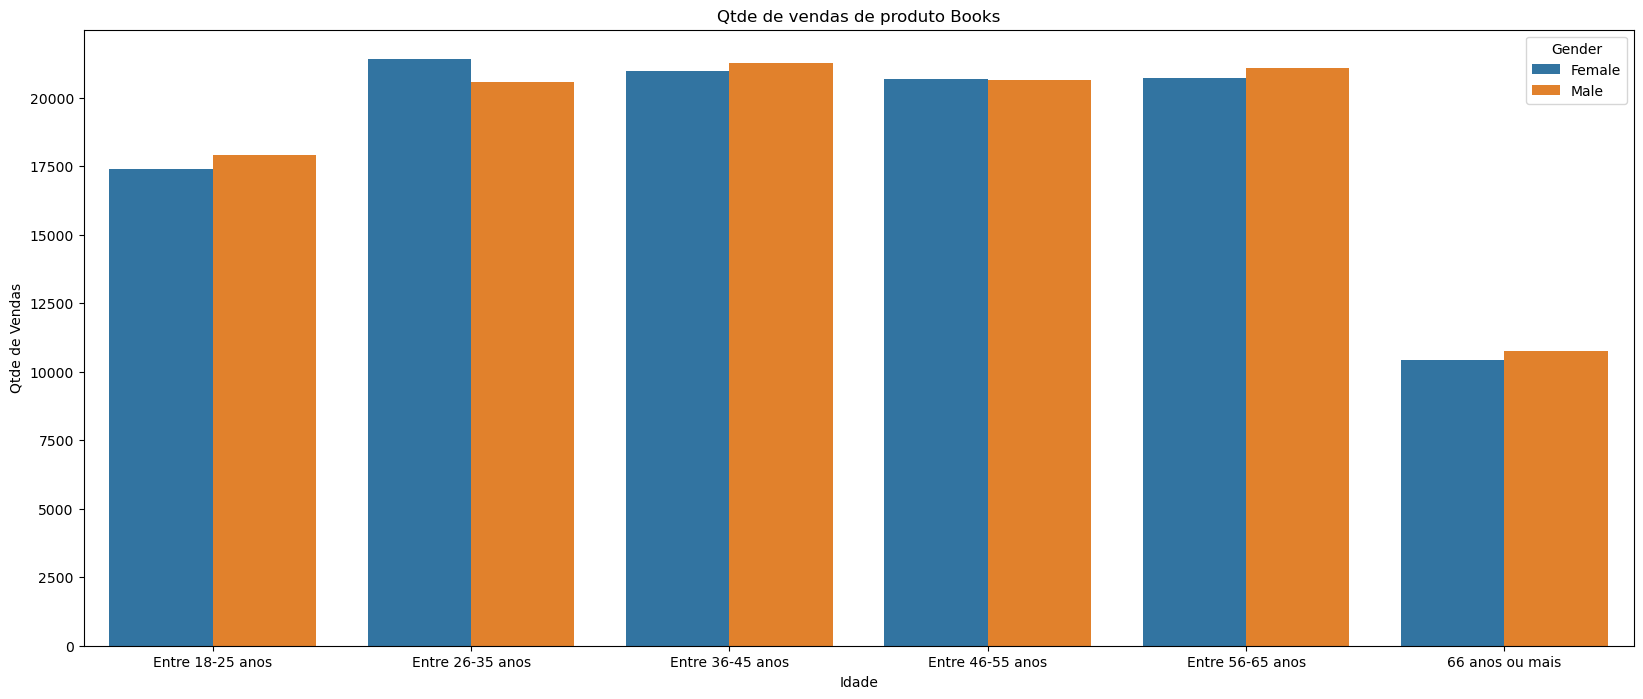

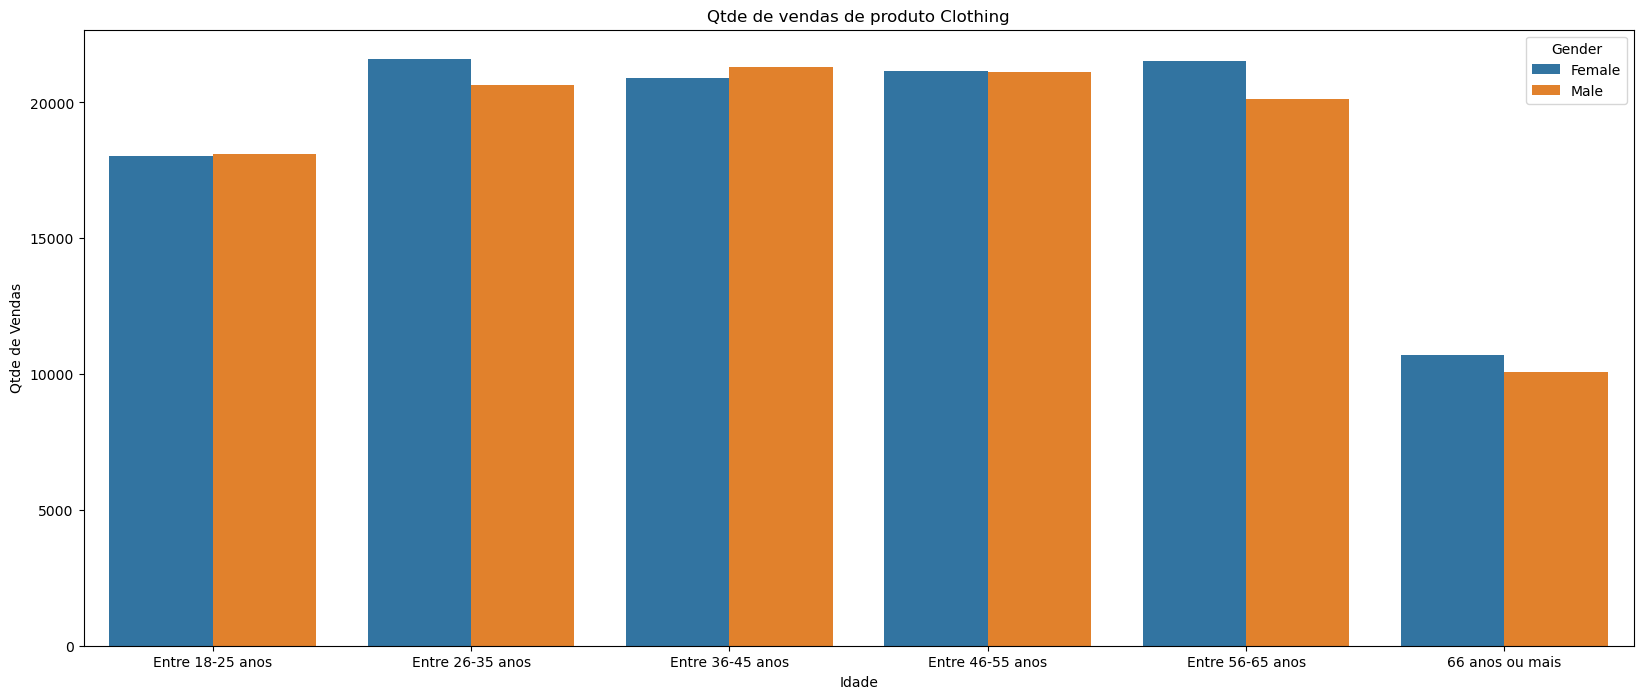

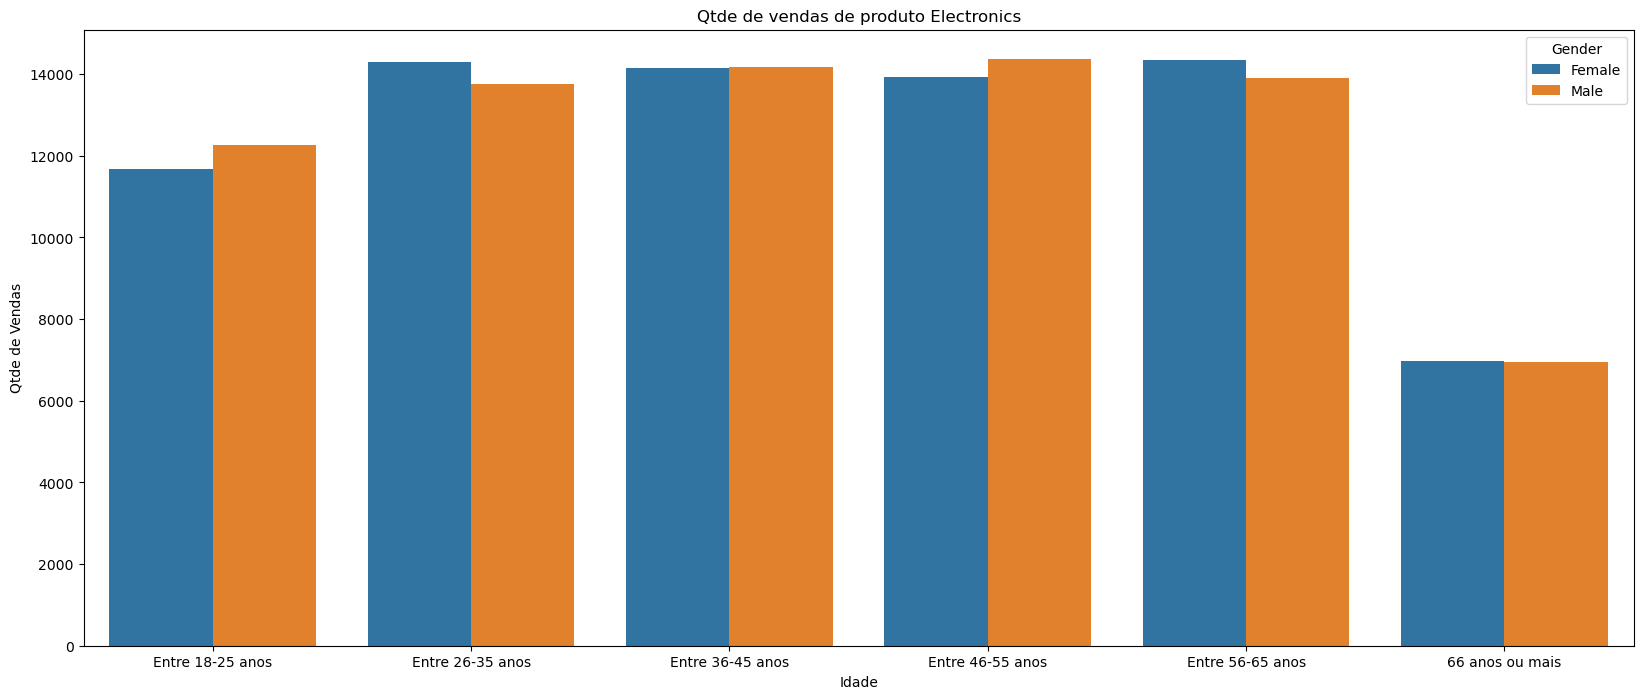

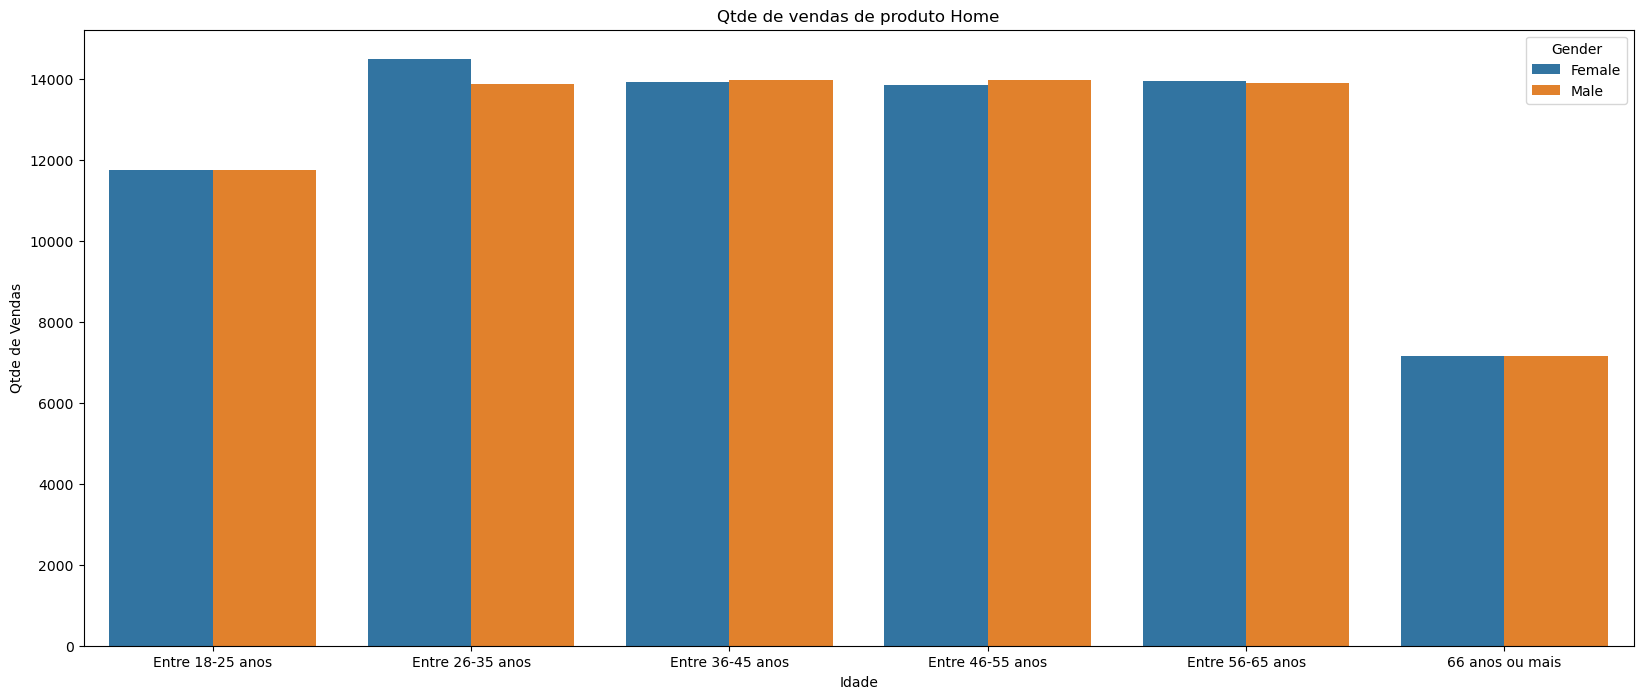

In [59]:
ordem = ['Entre 18-25 anos', 'Entre 26-35 anos', 'Entre 36-45 anos', 'Entre 46-55 anos', 'Entre 56-65 anos', '66 anos ou mais']

for product in df_agrupado['Product_Category'].unique():
    
    df_filtrado = df_agrupado[df_agrupado['Product_Category'] == product]
    
    fig = plt.figure(figsize=(20,8))
    sns.barplot(x='faixa_idade', y='Qtde_vendas', hue='Gender', data=df_filtrado, order=ordem)
    plt.xlabel('Idade')
    plt.ylabel('Qtde de Vendas')
    plt.title(f'Qtde de vendas de produto {product}')
    plt.show()